In [0]:
from __future__ import division
import math
import matplotlib.pyplot as plt

import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import time

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data from Drive

In [0]:
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Real-4.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Real-6.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Real-8.csv

! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Impostor-4.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Impostor-6.csv
! wget https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Impostor-8.csv

--2020-06-01 06:46:53--  https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Real-4.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507 (135K) [text/plain]
Saving to: ‘pins-Real-4.csv’

pins-Real-4.csv     100%[===================>] 135.26K  --.-KB/s    in 0.04s   

2020-06-01 06:46:53 (3.29 MB/s) - ‘pins-Real-4.csv’ saved [138507/138507]

--2020-06-01 06:46:55--  https://raw.githubusercontent.com/sidneyaguirre/python-bioauthentication/master/pressure/pins-Real-6.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting resp

In [0]:
#Data set csv files
dataPin4 = pd.read_csv('pins-Real-4.csv')
dataPin6 = pd.read_csv('pins-Real-6.csv')
dataPin8 = pd.read_csv('pins-Real-8.csv')
dataPin4Impostor = pd.read_csv('pins-Impostor-4.csv')
dataPin6Impostor  = pd.read_csv('pins-Impostor-6.csv')
dataPin8Impostor  = pd.read_csv('pins-Impostor-8.csv')

In [0]:
listUsers = [19,33,43,44]

In [0]:
dataPin6.shape

(675, 43)

# Cleaning data

Hence we can see there are 2911 rows and 72 columns

In [0]:
#dataless-columns in dataPin are taken away
def dataCleaning(data):
  data = data.dropna(axis = 0, how = 'all')
  return data

data_new =data.dropna(axis=0,how='all')
data_new.head()
data_new.columns

In [0]:
def listUser(dataset, listUsers, target=1):

  users = list() 
  cleaned_data = dataCleaning(dataset)
  for i in listUsers:

    df_user = cleaned_data[cleaned_data['user'] == i]
    df_user['target'] = target
    df_user.drop(['user','length'],axis=1, inplace=True)
    user = df_user.values
    users.append(user)
      
  return users

In [0]:
listUserPin4 = listUser(dataPin4, listUsers)
listUserPin6 = listUser(dataPin6, listUsers)
listUserPin8 = listUser(dataPin8, listUsers)

listUserPin4Impostors = listUser(dataPin4Impostor, listUsers, target = -1)
listUserPin6Impostors = listUser(dataPin6Impostor, listUsers, target = -1)
listUserPin8Impostors =listUser(dataPin8Impostor, listUsers, target = -1)

In [0]:
#ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [0]:
#Metrics: precision (precision_score), sensitivity (recall_score), 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
def metrics(Ytrain,Yval,y_predict_train, y_predict_valid):
  #print('Getting metrics...')

  accuracyTrain = np.mean(y_predict_train.ravel() == Ytrain.ravel())

  accuracyValid =np.mean(y_predict_valid.ravel() == Yval.ravel()) 


  return accuracyTrain, accuracyValid        

## Get X and Y sets


In [0]:
s = 1
data = listUserPin6[s]
Xtrain = data[:,0:40]
Ytrain = data[:,41]
Ytrain = Ytrain.astype(int)

In [0]:
s = 1
dataI = listUserPin6Impostors[s]
Xtest_Impostors = dataI[:,0:40]
Ytest_Impostors = dataI[:,41]
Ytest_Impostors = Ytest_Impostors.astype(int)

In [0]:
Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(Xtrain, Ytrain, train_size=20)

In [0]:
Xtest_original = np.concatenate((Xtest_original,Xtest_Impostors)) 
Xtest_original.shape

(10, 40)

In [0]:
Ytest_original = np.concatenate((Ytest_original,Ytest_Impostors)) 
Ytest_original.shape

(10,)

# Models

In [0]:
# MODELS
from sklearn.ensemble import IsolationForest
from sklearn import svm

In [0]:
modelIsoForest = IsolationForest()
modelSVM = svm.OneClassSVM()

## Manual Grid Search

In [0]:
from sklearn.model_selection import ParameterGrid

gridSVM = {'nu' : [0.00001, 0.0001, 0.001, 0.01, 0.1], 'gamma' : ['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gridIsoForest = {'n_estimators': list(range(5, 25, 4)), 
                'max_samples': ['auto'], 
                'contamination': [0, 0.5], 
                'max_features': [5,10,15,20], 
                'bootstrap': [True,False], 
                'n_jobs': [-1]}

In [0]:
list(ParameterGrid(gridSVM))
len(list(ParameterGrid(gridSVM)))

40

In [0]:
list(ParameterGrid(gridIsoForest))
len(list(ParameterGrid(gridIsoForest)))

80

# GridSearch V1.1

In [0]:
modelsAndGrids = [('modelIsoForest ', modelIsoForest, gridIsoForest), ('modelSVM', modelSVM, gridSVM)]

In [0]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from numpy import random


In [0]:
a = [1,2,3,1,1,3,4,3,2]
index_sets = [np.argwhere(1==a)]
index_sets

[array([], shape=(0, 0), dtype=int64)]

In [0]:
def GridSearch(Xtrain_original,Ytrain_original,models):
  # create lists to store final results
  train_score = []
  val_score = []
  std_train= []
  std_val=[]
  best_params = []
  models_results = []

  Folds = 10
  results = list()
  gsAccuracy = 0
  random.seed(19680801)
  #Data Normalization
  scaler = preprocessing.StandardScaler().fit(Xtrain_original)
  Xtrain_original = scaler.transform(Xtrain_original)
  
  kf = KFold(n_splits=Folds,shuffle=True)
  for m in range(0,len(models)):
    params = []
    meanAccuracyValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanAccuracyTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdValid = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    meanStdTrain = np.zeros((len(list(ParameterGrid(models[m][2]))),1))
    result = list()
    k=0
    for z in ParameterGrid(models[m][2]):
      params.append(z)
      accuracyTrainFolds = np.zeros((Folds,1))
      accuracyValidFolds = np.zeros((Folds,1))
      stdTrainFolds = np.zeros((Folds,1))
      stdValidFolds = np.zeros((Folds,1))
      j=0
      
      models[m][1].set_params(**z)

      for train, valid in kf.split(Xtrain_original):
        Xtrain = Xtrain_original[train,:]
        Ytrain = Ytrain_original[train]
        Xvalid = Xtrain_original[valid,:]
        Yvalid = Ytrain_original[valid]

        models[m][1].fit(Xtrain)

        y_predict_train =  models[m][1].predict(Xtrain)
        
        #Validation
        y_predict_valid = models[m][1].predict(Xvalid)



        accuracyTrainFolds[j], accuracyValidFolds[j] = metrics(Ytrain,Yvalid,y_predict_train,y_predict_valid )
        
        j+=1

      meanAccuracyTrain[k], meanAccuracyValid[k], meanStdTrain[k], meanStdValid[k] = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.std(accuracyTrainFolds), np.std(accuracyValidFolds)
      k+=1
    result.append([models[m][0], meanAccuracyValid[np.argmax(meanAccuracyValid)],meanStdValid[np.argmax(meanAccuracyValid)], params[np.argmax(meanAccuracyValid)]])

    results.append(result)

  return results

In [0]:
results = GridSearch(Xtrain_original,Ytrain_original,modelsAndGrids)

In [0]:
IF = results[0]
OC = results[1]
OCP = OC[0]
IFP = IF[0]
IFParams = IFP[3]
SVMParams = OCP[3]

In [0]:
IFParams

{'bootstrap': True,
 'contamination': 0,
 'max_features': 5,
 'max_samples': 'auto',
 'n_estimators': 5,
 'n_jobs': -1}

In [0]:
# IFParams = {'bootstrap': True,
#  'contamination': 0,
#  'max_features': 22,
#  'max_samples': 'auto',
#  'n_estimators': 17,
#  'n_jobs': -1}

In [0]:
SVMParams

{'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.01}

In [0]:
columns=["models","mean train Accuracy","CI (+-)", "Best params"]
result0 = pd.DataFrame(results[0],columns=columns)
result1 = pd.DataFrame(results[1],columns=columns)

In [0]:
resultados_finales = result0.append(result1)

In [0]:
resultados_finales

,models,mean train Accuracy,CI (+-),Best params
0,modelIsoForest,[1.0],[0.0],"{'bootstrap': True, 'contamination': 0, 'max_f..."
0,modelSVM,[0.6],[0.30000000000000004],"{'gamma': 'scale', 'kernel': 'sigmoid', 'nu': ..."


# Best model evaluation with all users

In [0]:
def MetricsBestParamsAllUsers(model, users, impostors):
  
  # create lists to store train and validation scores
  test_score = []
  FPR_score = []
  TPR_score = []

  for u in range(0,len(users)):

    data = users[u]
    Xtrain = data[:,0:40]
    Ytrain = data[:,41]
    Ytrain = Ytrain.astype(int)

    dataI = impostors[u]
    Xtest_Impostors = dataI[:,0:40]
    Ytest_Impostors = dataI[:,41]
    Ytest_Impostors=Ytest_Impostors.astype(int)

    Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(Xtrain, Ytrain, train_size=20)

    Xtest_original = np.concatenate((Xtest_original,Xtest_Impostors)) 
    Ytest_original = np.concatenate((Ytest_original,Ytest_Impostors))

    #Data Normalization
    scaler = preprocessing.StandardScaler().fit(Xtrain_original)
    Xtrain_original = scaler.transform(Xtrain_original)
    Xtest_original = scaler.transform(Xtest_original)


    model.fit(Xtrain_original)

    y_predicted = model.predict(Xtest_original)

    accuracy = accuracy_score(Ytest_original, y_predicted)

    test_score.append(accuracy)

    cm1 = confusion_matrix(Ytest_original,y_predicted)

    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    FPR = 1 - specificity

    FPR_score.append(FPR)
    
    TPR = recall_score(Ytest_original, y_predicted) 

    TPR_score.append(TPR)
    
  test_score = np.array(test_score)
  FPR_score = np.array(FPR_score)
  TPR_score = np.array(TPR_score)

  meanTestAccuracy, meanFPRScore, meanTPRScore = np.mean(test_score), np.mean(FPR_score), np.mean(TPR_score)



  users_index = np.linspace(0,25,26,dtype=int).tolist()
  # meanAccuracyTrain[u] , meanAccuracyValid[u] , meanStdTrain[u], meanStdValid[u] = build_model(model, best_parameters, i, X,Y)
  # data = {'User':users_index, 'Test_Accuracy':test_score, 'FPR_score': FPR_score , 'TPR_score':TPR_score}
  data = {'Mean_Test_Accuracy':meanTestAccuracy, 'Mean_FPR_score': meanFPRScore , 'Mean_TPR_score':meanTPRScore}
  df_split_params = pd.DataFrame(data, index=[0])
     
  return df_split_params

## IsolationForest best parameters

In [0]:
IsolationForest_best_params = IFParams

IsolationForest__best_estimator = modelsAndGrids[0][1].set_params(**IsolationForest_best_params)

In [0]:
metricsIF = MetricsBestParamsAllUsers(IsolationForest__best_estimator, listUserPin6, listUserPin6Impostors )

In [0]:
metricsIF

,Mean_Test_Accuracy,Mean_FPR_score,Mean_TPR_score
0,0.7,0.1,0.9


## OneClassSVM best parameters

In [0]:
SVM_best_params = SVMParams
SVM__best_estimator = modelsAndGrids[1][1].set_params(**SVM_best_params)

In [0]:
metricsSVM = MetricsBestParamsAllUsers(SVM__best_estimator,listUserPin6, listUserPin6Impostors)

In [0]:
metricsSVM

,Mean_Test_Accuracy,Mean_FPR_score,Mean_TPR_score
0,0.775,0.35,0.65


## Builder model definition All Users

In [0]:
#Metrics: precision (precision_score), sensitivity (recall_score), 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
def metricsAll(Ytrain,Yval,y_predict_train, y_predict_valid):
  #print('Getting metrics...')

  accuracyTrain = np.mean(y_predict_train.ravel() == Ytrain.ravel())

  accuracyValid =np.mean(y_predict_valid.ravel() == Yval.ravel()) 

  cm1 = confusion_matrix(Yval,y_predict_valid)

  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

  FPR = 1 - specificity
  
  TPR = recall_score(Yval, y_predict_valid) 

  return accuracyTrain, accuracyValid, FPR, TPR  

In [0]:
def build_model(model, parameters, train_size, X,Y,XImpostors,YImpostors):
  # Xtrain_original, Xtest_original, Ytrain_original, Ytest_original = train_test_split(X, Y, train_size=20)
  # Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)
  #Data Normalization

  Folds = 10
  accuracyTrainFolds = np.zeros((Folds,1))
  accuracyValidFolds = np.zeros((Folds,1))
  FPRFolds = np.zeros((Folds,1))
  TPRFolds = np.zeros((Folds,1))
  j=0

  for i in range(Folds):

    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=train_size)

    Xtest = np.concatenate((Xtest,XImpostors)) 
    Ytest = np.concatenate((Ytest,YImpostors))

    scaler = preprocessing.StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    
    model.fit(Xtrain)

    ypred_train = model.predict(Xtrain)

    ypred_valid = model.predict(Xtest)


    accuracyTrainFolds[i], accuracyValidFolds[i], FPRFolds[i], TPRFolds[i] = metricsAll(Ytrain,Ytest,ypred_train,ypred_valid)
  
  accuracyTrain, accuracyValid, stdTrain, stdValid, FPR, TPR = np.mean(accuracyTrainFolds), np.mean(accuracyValidFolds), np.std(accuracyTrainFolds), np.std(accuracyValidFolds), np.mean(FPRFolds), np.mean(TPRFolds)
  return accuracyTrain, accuracyValid, stdTrain, stdValid, FPR, TPR


# All users

In [0]:
def learning_curve_all_users( model, best_parameters , users, impostors, suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy'):

  """
  Parameters
  ----------
  suptitle : str
      Chart suptitle
  title: str
      Chart title
  xlabel: str
      Label for the X axis
  ylabel: str
      Label for the y axis
  Returns
  -------
  Plot of learning curves
  """

  # create lists to store train and validation scores
  train_score = []
  val_score = []
  std_train= []
  std_val=[]
  FPR_score=[]
  TPR_score=[]

  training_set_sizes = np.linspace(5,24,19,dtype=int).tolist()

  for i in training_set_sizes:
    meanAccuracyValid = np.zeros((len(users),1))
    meanAccuracyTrain = np.zeros((len(users),1))
    meanStdValid = np.zeros((len(users),1))
    meanStdTrain = np.zeros((len(users),1))
    meanFPR = np.zeros((len(users),1))
    meanTPR = np.zeros((len(users),1))

    for u in range(0,len(users)):
      data = users[u]
      Xtrain_original = data[:,0:40]
      Ytrain_original = data[:,41]
      Ytrain_original = Ytrain_original.astype(int)

      dataI = impostors[u]
      Xtest_original = dataI[:,0:40]
      Ytest_original = dataI[:,41]
      Ytest_original=Ytest_original.astype(int)

      X=Xtrain_original
      Y=Ytrain_original
        
      meanAccuracyTrain[u] , meanAccuracyValid[u] , meanStdTrain[u], meanStdValid[u], meanFPR[u], meanTPR[u] = build_model(model, best_parameters, i, X,Y,Xtest_original,Ytest_original)
    EfficiencyTrain, EfficiencyVal, stdTrain, stdVal, FPR, TPR = np.mean(meanAccuracyTrain), np.mean(meanAccuracyValid), np.mean(meanStdTrain), np.mean(meanStdValid), np.mean(meanFPR), np.mean(meanTPR)

    # store the scores in their respective lists
    train_score.append(EfficiencyTrain)
    val_score.append(EfficiencyVal)
    std_train.append(stdTrain)
    std_val.append(stdVal)
    FPR_score.append(FPR)
    TPR_score.append(TPR)

  train_score =np.array(train_score)
  val_score =np.array(val_score)
  std_train =np.array(std_train)
  std_val =np.array(std_val)
  FPR_score =np.array(FPR_score)
  TPR_score =np.array(TPR_score)


  # plot learning curves
  fig, ax = plt.subplots(figsize=(14, 9))
  ax.plot(training_set_sizes, train_score, c='gold')
  ax.plot(training_set_sizes, val_score, c='steelblue')
  
  ax.fill_between(training_set_sizes,train_score+std_train,train_score-std_train,facecolor='gold',alpha=0.5)
  ax.fill_between(training_set_sizes,val_score+std_val,val_score-std_val,facecolor='steelblue',alpha=0.5)

  # format the chart to make it look nice
  fig.suptitle(suptitle, fontweight='bold', fontsize='20')
  ax.set_title(title, size=20)
  ax.set_xlabel(xlabel, size=16)
  ax.set_ylabel(ylabel, size=16)
  ax.legend(['Train set', 'Test set'], fontsize=16)
  ax.tick_params(axis='both', labelsize=12)
  ax.set_ylim(0, 1)

  def percentages(x, pos):
      """The two args are the value and tick position"""
      if x < 1:
          return '{:1.0f}'.format(x*100)
      return '{:1.0f}%'.format(x*100)

  def numbers(x, pos):
      """The two args are the value and tick position"""
      if x >= 1000:
          return '{:1,.0f}'.format(x)
      return '{:1.0f}'.format(x)

  data = {'Train_Size':training_set_sizes, 'mean_train_Accuracy':train_score,'mean_test_Accuracy':val_score,'std_train_Accuracy':std_train,'std_test_Accuracy':std_val, 'FPR_score': FPR_score , 'TPR_score':TPR_score}
  df_split_params = pd.DataFrame(data)
  return df_split_params

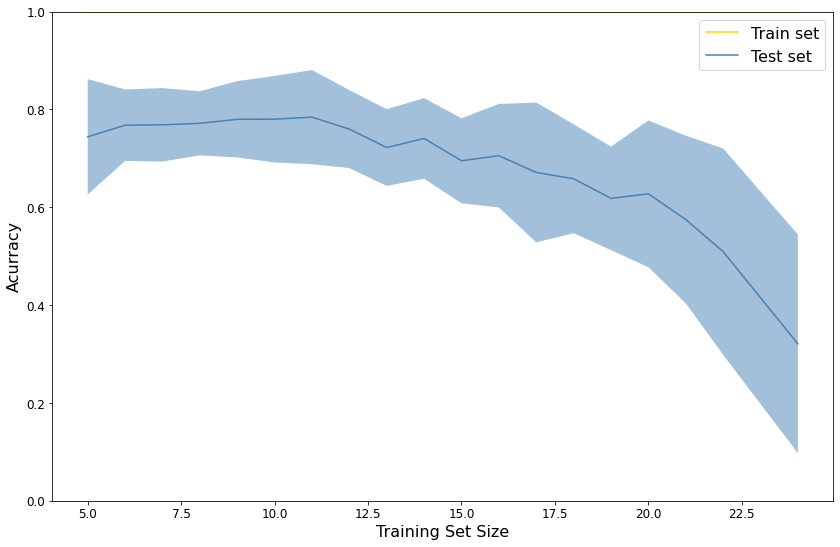

In [0]:
df_split_all_users_IF = learning_curve_all_users(model=IsolationForest__best_estimator,best_parameters=IsolationForest_best_params, users=listUserPin6,impostors=listUserPin6Impostors)

In [0]:
df_split_all_users_IF

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy,FPR_score,TPR_score
0,5,1.0,0.744000,0.0,0.117912,0.111250,0.888750
1,6,1.0,0.767708,0.0,0.073054,0.069737,0.930263
2,7,1.0,0.768478,0.0,0.075120,0.058333,0.941667
3,8,1.0,0.771591,0.0,0.065418,0.055882,0.944118
4,9,1.0,0.779762,0.0,0.078043,0.070312,0.929688
5,10,1.0,0.780000,0.0,0.088401,0.061667,0.938333
6,11,1.0,0.784211,0.0,0.096229,0.046429,0.953571
7,12,1.0,0.759722,0.0,0.079611,0.036538,0.963462
8,13,1.0,0.722059,0.0,0.078433,0.056250,0.943750
9,14,1.0,0.740625,0.0,0.082473,0.038636,0.961364


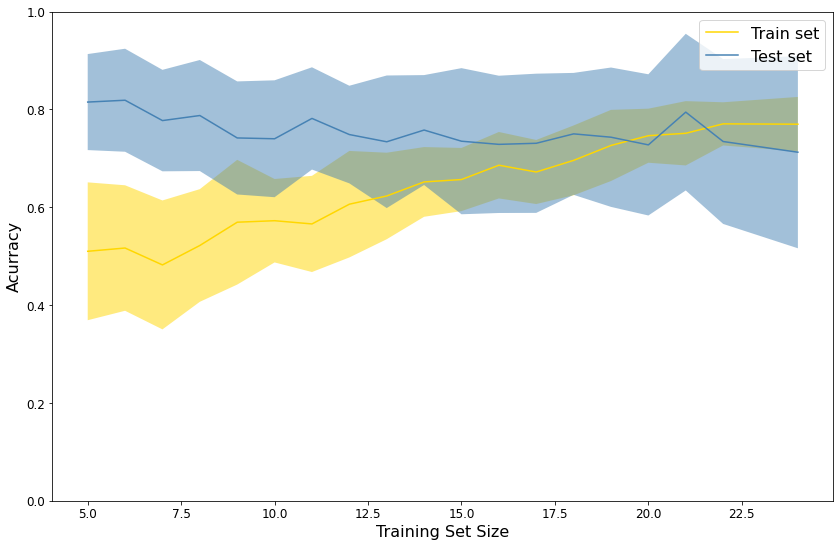

In [0]:
df_split_all_users_SVM = learning_curve_all_users(model=SVM__best_estimator,best_parameters=SVM_best_params, users=listUserPin6,impostors=listUserPin6Impostors)

In [0]:
df_split_all_users_SVM

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy,FPR_score,TPR_score
0,5,0.510000,0.815000,0.140903,0.098133,0.128750,0.871250
1,6,0.516667,0.818750,0.128258,0.105270,0.140789,0.859211
2,7,0.482143,0.777174,0.131773,0.103694,0.175000,0.825000
3,8,0.521875,0.787500,0.115134,0.113490,0.179412,0.820588
4,9,0.569444,0.741667,0.127493,0.115564,0.235937,0.764062
5,10,0.572500,0.740000,0.085263,0.119462,0.215000,0.785000
6,11,0.565909,0.781579,0.098327,0.104488,0.207143,0.792857
7,12,0.606250,0.748611,0.108862,0.099759,0.240385,0.759615
8,13,0.623077,0.733824,0.088424,0.135500,0.256250,0.743750
9,14,0.651786,0.757812,0.071263,0.112321,0.206818,0.793182
